## Reaction Modeling - Least_squares problem
__This part is consisted of two problems. First problem discusses the Michaelis-Menten kinetic model and warms up your data visualization skills. Second problem asks you to conduct a least_squares fit using the projection method discussed in the class.__ 

__Problem 1 :__ Michaelis-Menten model is one of the most well-known kinetic models that has been proposed for enzymatic reactions. The formula for this mechanism is as follows:  

$v=\dfrac{V_{max}[S]}{K_M+[S]}$

Where, $v$ is the reaction rate, $V_{max}$ is the maximum reaction rate and $[S]$ is the concentration of substrate and $K_M$ is the Michaelis constant.  
(a) Assuming that $V_{max}=0.5$ $(mM/min)$ and $K_M=2$ $(mM)$ plot the reaction rate as a function of substrate concentration when $1<[S]<100$. (10 points)   
(b) As the plot in part (a) shows, there is a non-linear relationship between reaction rate $v$ and substrate concentration $[S]$. However, one can easily show that the there is a linear relationship between $\dfrac{1}{v}$ and $\dfrac{1}{[S]}$. Plot  $\dfrac{1}{v}$ versus $\dfrac{1}{[S]}$ when $1<[S]<100$. Based on the Michaelis-Menten model, what should be the slope and intercept of the line? (10 points)

Text(0.5, 1.0, 'Reaction rate vs. Substrate concentration')

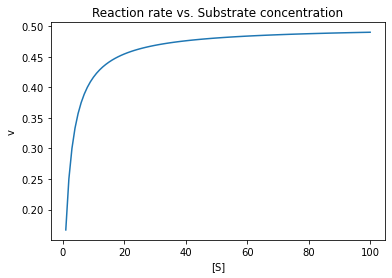

In [12]:
#Enter your code here
S=np.arange(1,101)
v=(0.5*(S))/(2+S)
plt.plot(S,v)
plt.ylabel('v')
plt.xlabel('[S]')
plt.title('Reaction rate vs. Substrate concentration')

4.0
2.0


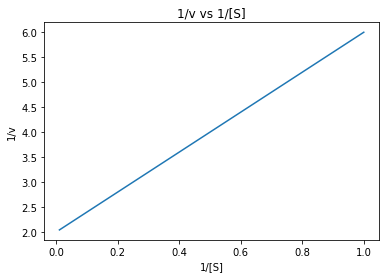

In [13]:
#Enter your code here
S=np.arange(1,101)
v=(0.5*(S))/(2+S)
plt.plot(1/S,1/v)
plt.ylabel('1/v')
plt.xlabel('1/[S]')
plt.title('1/v vs 1/[S]')
Slope=((1/v[99])-(1/v[0]))/((1/S[99])-(1/S[0]))
print(Slope)
Intercept = Slope*0 - Slope* (1/S[0]) + (1/v[0])
print(Intercept)

__Problem 2 :__ You have been asked to analyze an enzymatic reaction that is known to follow Michaelis-Menten kinetic model and find the model parameters $V_{max}$ and $K_m$. A student has conducted the reaction in the lab and collected the reaction rate data versus concentration of substrate. As problem 1 suggests, if the reaction truly follows the Michaelis-Menten model, there should be a perfect linear relationship between $\dfrac{1}{v}$ versus $\dfrac{1}{[S]}$.However, the water bath that student used to conduct the experiment was not working properly and the temperature fluctuated throughout the experiment. As a result, the data is noisy and rate measurements are not accurate. The data is provided as a ".csv" file. Using the data set, answer the following questions:  
(a) Read the data from the ".csv" file as a Pandas data frame. Add two new columns and store values of $\dfrac{1}{v}$ and $\dfrac{1}{[S]}$ in those columns. (10 points)  
(b) Visualize the $v$ versus $[S]$ and also $\dfrac{1}{v}$ versus $\dfrac{1}{[S]}$ in two plots side by side. (Look up subplot command from matplotlib library). (10 points)   
(c) Find the best estimates for $V_{max}$ and $K_M$ by fitting a line to the data using the projection method discussed in the class. (10 points)    
(d) Make a scatter plot of the $\dfrac{1}{v}$ versus $\dfrac{1}{[S]}$ and overlay the fitted model as a line on the same plot. Does the data follow the model? (10 points)  
(e) Use sns.regplot to reproduce the same plot as part (d). (10 points)


In [14]:
Reaction_data=pd.read_csv('Reaction data.csv')
Reaction_data["1/S"]=1/Reaction_data["S"]
Reaction_data["1/v"]=1/Reaction_data["v"]
Reaction_data

,S,v,1/S,1/v
0,100,2.513419,0.010000,0.397864
1,101,2.494248,0.009901,0.400922
2,102,2.526376,0.009804,0.395824
3,103,2.508451,0.009709,0.398652
4,104,2.501612,0.009615,0.399742
...,...,...,...,...
96,196,2.726562,0.005102,0.366762
97,197,2.728704,0.005076,0.366474
98,198,2.713848,0.005051,0.368480
99,199,2.723769,0.005025,0.367138


Text(0.5, 1.0, '1/v vs 1/[S]')

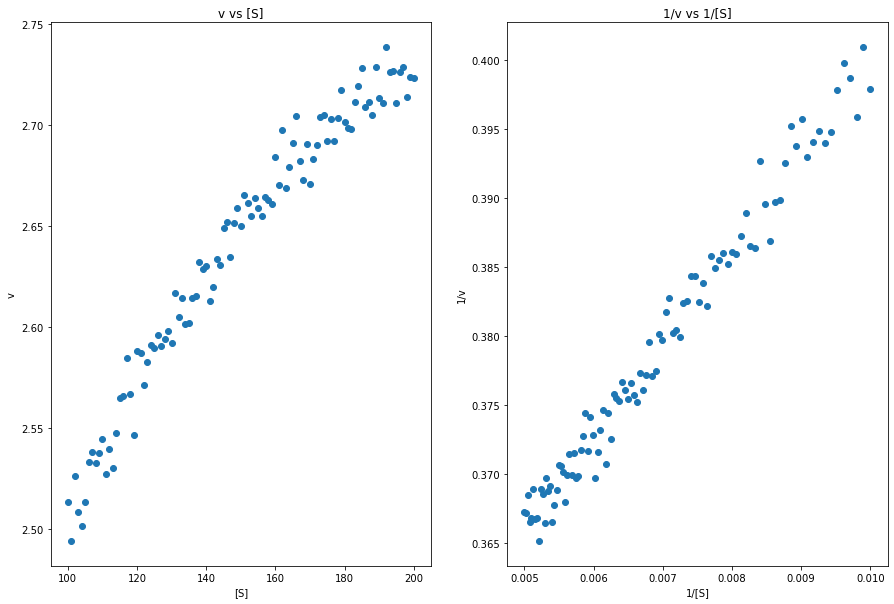

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.scatter(Reaction_data["S"],Reaction_data["v"])
plt.ylabel('v')
plt.xlabel('[S]')
plt.title('v vs [S]')
plt.subplot(1,2,2)
plt.scatter(Reaction_data["1/S"],Reaction_data["1/v"])
plt.ylabel('1/v')
plt.xlabel('1/[S]')
plt.title('1/v vs 1/[S]')

In [16]:
A=np.full(shape=(101,1),fill_value=1)
A=np.concatenate((A, np.reshape(Reaction_data["1/S"].values,(101,1))), axis=1)
b=np.reshape(Reaction_data["1/v"].values,(101,1))
At=A.transpose()
X1 = np.linalg.inv(np.dot(At,A))
X2 = np.dot(At,b)
X= np.dot(X1,X2)
Vmax=1/X[0]
print('Vmax=',Vmax)
Km = X[1]*Vmax
print('Km=',Km)

Vmax= [3.01130112]
Km= [20.42402963]


Text(0.5, 1.0, '1/v vs 1/[S]')

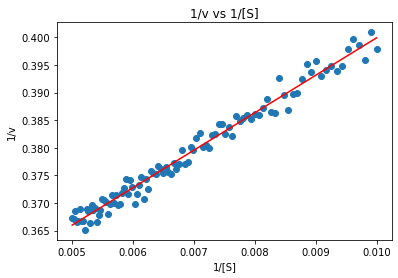

In [17]:
one_v_computed = (Km/Vmax)*Reaction_data["1/S"].values + 1/Vmax
plt.scatter(Reaction_data["1/S"],Reaction_data["1/v"])
plt.plot(Reaction_data["1/S"], one_v_computed,'r')
plt.ylabel('1/v')
plt.xlabel('1/[S]')
plt.title('1/v vs 1/[S]')
#Yes data given follows the model

Text(0.5, 1.0, '1/v vs 1/[S]')

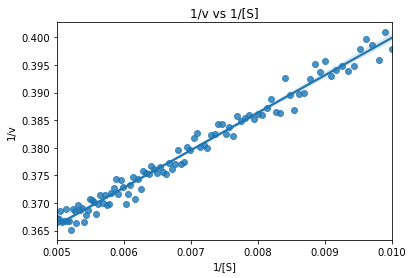

In [18]:
sns.regplot(Reaction_data["1/S"],Reaction_data["1/v"])
plt.ylabel('1/v')
plt.xlabel('1/[S]')
plt.title('1/v vs 1/[S]')